<a href="https://colab.research.google.com/github/add54/-docs-Dwyer-G.-Aggarwal-S.-Stouffer-J.---Flask-Building-Python-Web-Services---2017.pdf-/blob/master/Cryptocurrency_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cryptocurrency Price Prediction using Python
I’ll start the task of Cryptocurrency price prediction by importing the necessary Python libraries and the dataset we need. For this task, I will collect the latest Bitcoin prices data from Yahoo Finance, using the yfinance API. This will help you collect the latest data each time you run this code:

In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close","Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head)

<bound method NDFrame.head of           Date          Open          High           Low         Close  \
0   2021-11-20  58115.082031  59859.878906  57469.726562  59697.195312   
1   2021-11-21  59730.507812  60004.425781  58618.929688  58730.476562   
2   2021-11-22  58706.847656  59266.359375  55679.839844  56289.289062   
3   2021-11-23  56304.554688  57875.515625  55632.761719  57569.074219   
4   2021-11-24  57565.851562  57803.066406  55964.222656  56280.425781   
..         ...           ...           ...           ...           ...   
725 2023-11-15  35548.113281  37964.894531  35383.781250  37880.582031   
726 2023-11-16  37879.980469  37934.625000  35545.472656  36154.769531   
727 2023-11-17  36164.824219  36704.484375  35901.234375  36596.683594   
728 2023-11-18  36625.371094  36839.281250  36233.312500  36585.703125   
729 2023-11-19  36585.765625  37509.355469  36414.597656  37386.546875   

        Adj Close       Volume  
0    59697.195312  30624264863  
1    58730.4765

In [3]:
data.shape


(730, 7)

So the dataset contains 731 rows, where the first row contains the names of each column. Now let’s visualize the change in bitcoin prices till today by using a candlestick chart:

In [4]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"],
                                        high=data["High"],
                                        low=data["Low"],
                                        close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis",
                     xaxis_rangeslider_visible=False)
figure.show()



The Close column in the dataset contains the values we need to predict. So, let’s have a look at the correlation of all the columns in the data concerning the Close column:

In [5]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
Low          0.997772
High         0.997731
Open         0.995313
Volume       0.034038
Name: Close, dtype: float64


<ipython-input-5-81091e368782>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<ipython-input-9-76913f52a6cc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



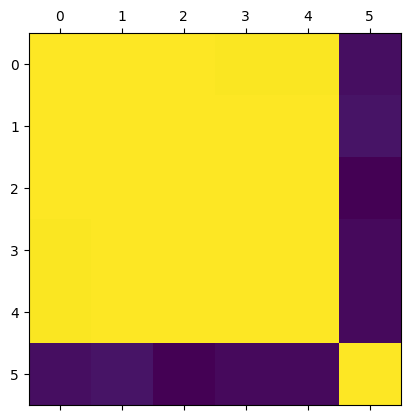

In [9]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

#Cryptocurrency Price Prediction Model
Predicting the future prices of cryptocurrency is based on the problem of Time series analysis. The AutoTS library in Python is one of the best libraries for time series analysis. So here I will be using the AutoTS library to predict the bitcoin prices for the next 30 days

In [14]:
pip install autots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.3/801.3 kB 8.9 MB/s eta 0:00:00


In [15]:
from autots import AutoTS
model = AutoTS(forecast_length=30, frequency='infer', ensemble='simple')
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Data frequency is: D, used frequency is: D
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 7 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 8 with model DatepartRegression in generation 0 of 10
Epoch 1/50
22/22 [==============================] - 14s 7ms/step - loss: 0.4134
Epoch 2/50
22/22 [==============================] - 0s 6ms/step - loss: 0.4003
Epoch 3/50
22/22 [==============================] - 0s 6ms/step - loss: 0.3827
Epoch 4/50
22/22 [==============================] - 0s 6ms/step - loss: 0.3679
Epoch 5/50
22/22 [==============================] - 0s 6ms/step - loss: 0.3595
Epoch 6/50
22/22 [==============================] - 0s 6ms/step - loss: 0.3563
Epoch 7/50
22/22 [==============================] - 0s 6ms/step - loss: 0.3548
Epoch 8/50
22/22 [==============================] - 0s 7ms/step - loss: 0.3497
Epoch 9/50
22/22 [==============================] - 0s 7ms/step - loss: 0.3470
Epoch 10/50
22/22 [==============================] - 0s 6ms/step - loss: 0.3491
Epoch 11/50
22/22 [==============================] - 0s 7ms/step - loss: 0.3522
Epoch 12/50
22/22 [==============================] - 0s 7ms/

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 36 with model FBProphet in generation 0 of 10


DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8osgxn6/pbr5h163.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw8osgxn6/1kat3isu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86668', 'data', 'file=/tmp/tmpw8osgxn6/pbr5h163.json', 'init=/tmp/tmpw8osgxn6/1kat3isu.json', 'output', 'file=/tmp/tmpw8osgxn6/prophet_modelyztvn0g8/prophet_model-20231120074114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegression in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model UnobservedComponents 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 69 with model FBProphet in generation 0 of 10
Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Model Number: 72 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 73 in generation 0: VECM
Model Number: 74 with model ARIMA in generation 0 of 10
Model Number: 75 with model WindowRegression in generation 0 of 10
Model Number: 76 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 78 with model MultivariateRegression in generation 0 of 10
Model Number: 79 with model UnivariateMotif in generation 0 of 10
Model Number: 80 with model MultivariateMotif in generation 0 of 10
Model Number: 81 with model SectionalMotif in generation 0 of 10
Model Number: 82 with model NVAR in generation 0 of 10
Model Number: 83 with model Theta in generation 0 of 10
Model Number: 84 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 84 in generation 0: ARDL
Model Number: 85 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 85 in generation 0: ARCH
Model Number: 86 with model MetricMotif in generation 0 of 10
Model Number: 87 with model WindowRegression in generation 0 of 10
Model Number: 88 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 104 with model ETS in generation 0 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'AlignLastValue', '1': 'PctChangeTransformer', '2': 'bkfilter', '3': 'DifferencedTransformer', '4': 'PctChangeTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag': 2, 'method': 'additive', 'strength': 1.0, 'first_value_only': False}, '1': {}, '2': {}, '3': {}, '4': {}}}. fail_on_forecast_nan=True") in model 104 in generation 0: ETS
Model Number: 105 with model ConstantNaive in generation 0 of 10
Model Number: 106 with model AverageValueNaive in generation 0 of 10
Model Number: 107 with model MultivariateMotif in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning:

overflow encountered in accumulate

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning:

overflow encountered in accumulate

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:57: RuntimeWarning:

overflow encountered in accumulate



Model Number: 108 with model MultivariateMotif in generation 0 of 10
Model Number: 109 with model DatepartRegression in generation 0 of 10
Model Number: 110 with model MetricMotif in generation 0 of 10
Model Number: 111 with model NVAR in generation 0 of 10
Model Number: 112 with model WindowRegression in generation 0 of 10
Epoch 1/50
17/17 [==============================] - 11s 103ms/step - loss: 0.2497 - val_loss: 0.2081
Epoch 2/50
17/17 [==============================] - 1s 38ms/step - loss: 0.2222 - val_loss: 0.1855
Epoch 3/50
17/17 [==============================] - 1s 35ms/step - loss: 0.1982 - val_loss: 0.1657
Epoch 4/50
17/17 [==============================] - 1s 34ms/step - loss: 0.1762 - val_loss: 0.1472
Epoch 5/50
17/17 [==============================] - 1s 34ms/step - loss: 0.1562 - val_loss: 0.1290
Epoch 6/50
17/17 [==============================] - 1s 35ms/step - loss: 0.1355 - val_loss: 0.1108
Epoch 7/50
17/17 [==============================] - 1s 33ms/step - loss: 0.116

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning:

The InversePower link function does not respect the domain of the Gamma family.



Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 134 in generation 0: GLM
Model Number: 135 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 135 in generation 0: ARCH
Model Number: 136 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 136 in generation 0: ARCH
Model Number: 137 with model ETS in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

overflow encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid value encountered in multiply



Model Number: 138 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 138 in generation 0: UnobservedComponents
Model Number: 139 with model SectionalMotif in generation 0 of 10
Model Number: 140 with model FBProphet in generation 0 of 10
Model Number: 141 with model VAR in generation 0 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 141 in generation 0: VAR
Model Number: 142 with model ARDL in generation 0 of 10
Model Number: 143 with model UnivariateMotif in generation 0 of 10
Model Number: 144 with model UnivariateMotif in generation 0 of 10
Model Number: 145 with model MultivariateMotif in generation 0 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 145 in generation 0: MultivariateMotif
Model Number: 146 with model SeasonalNaive in generation 0 of 10
Model Number: 147 with model Unobserve

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 154 with model NVAR in generation 0 of 10
Model Number: 155 with model ARDL in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 155 in generation 0: ARDL
Model Number: 156 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 156 in generation 0: VAR
Model Number: 157 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 157 in generation 0: DatepartRegression
Model Number: 158 with model UnivariateMotif in generation 0 of 10
Model Number: 159 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 159 in generation 0: ARIMA
Model Number: 160 with model ConstantNaive in generation 0 of 10
Model Number: 161 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regres

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in double_scalars



Model Number: 166 with model AverageValueNaive in generation 0 of 10
Model Number: 167 with model DatepartRegression in generation 0 of 10
Model Number: 168 with model GLM in generation 0 of 10
Model Number: 169 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue, try 1.23.1 {as of 06-2023}') in model 169 in generation 0: GluonTS
Model Number: 170 with model AverageValueNaive in generation 0 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 171 with model Theta in generation 0 of 10
Model Number: 172 with model WindowRegression in generation 0 of 10
Model Number: 173 with model SectionalMotif in generation 0 of 10
Model Number: 174 with model LastValueNaive in generation 0 of 10
Model Number: 175 with model VAR in generation 0 of 10
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 175 in generation 0: VAR
Model Number: 176 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 176 in generation 0: VECM
Model Number: 177 with model SeasonalNaive in generation 0 of 10
Model Number: 178 with model NVAR in generation 0 of 10
Model Number: 179 with model Theta in generation 0 of 10
Model Number: 180 with model AverageValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on inverse') in model 180 in generation 0: AverageValueNaive
Model Number: 181 with model LastValueNaive in ge

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Model Number: 188 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 188 in generation 1: DatepartRegression
Model Number: 189 with model UnivariateMotif in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Model Number: 190 with model GLM in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 191 with model GLS in generation 1 of 10
Model Number: 192 with model FBProphet in generation 1 of 10
Model Number: 193 with model LastValueNaive in generation 1 of 10
Model Number: 194 with model NVAR in generation 1 of 10
Model Number: 195 with model UnobservedComponents in generation 1 of 10
Model Number: 196 with model FBProphet in generation 1 of 10
Model Number: 197 with model SectionalMotif in generation 1 of 10
Model Number: 198 with model ARIMA in generation 1 of 10
Model Number: 199 with model UnobservedComponents in generation 1 of 10
Model Number: 200 with model SeasonalNaive in generation 1 of 10
Model Number: 201 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 201 in generation 1: SectionalMotif
Model Number: 202 with model Theta in generation 1 of 10
Model Number: 203 with model WindowRegression in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Model Number: 204 with model LastValueNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 205 with model ETS in generation 1 of 10
Model Number: 206 with model MetricMotif in generation 1 of 10
Model Number: 207 with model ARIMA in generation 1 of 10
Model Number: 208 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 208 in generation 1: ARDL
Model Number: 209 with model ETS in generation 1 of 10
Model Number: 210 with model MetricMotif in generation 1 of 10
Model Number: 211 with model Theta in generation 1 of 10


07:42:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 212 with model FBProphet in generation 1 of 10
Model Number: 213 with model SeasonalNaive in generation 1 of 10
Model Number: 214 with model WindowRegression in generation 1 of 10
Model Number: 215 with model ARIMA in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 215 in generation 1: ARIMA
Model Number: 216 with model ARDL in generation 1 of 10
Model Number: 217 with model GLS in generation 1 of 10
Model Number: 218 with model UnivariateMotif in generation 1 of 10
Model Number: 219 with model DatepartRegression in generation 1 of 10
Model Number: 220 with model UnobservedComponents in generation 1 of 10
Model Number: 221 with model Theta in generation 1 of 10
Model Number: 222 with model SeasonalNaive in generation 1 of 10
Model Number: 223 with model FBProphet in generation 1 of 10
Model Number: 224 with model WindowRegression in generation 1 of 10
Template Eval Error: LightGBMError('Unknown objective type name: regression,m

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.93459e-41): result may not be accurate.



Model Number: 228 with model SectionalMotif in generation 1 of 10
Model Number: 229 with model ETS in generation 1 of 10
Model Number: 230 with model GLM in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.



Model Number: 231 with model ETS in generation 1 of 10
Model Number: 232 with model ConstantNaive in generation 1 of 10
Model Number: 233 with model UnobservedComponents in generation 1 of 10
Model Number: 234 with model ARDL in generation 1 of 10
Model Number: 235 with model Theta in generation 1 of 10
Model Number: 236 with model GLM in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 237 with model LastValueNaive in generation 1 of 10
Model Number: 238 with model UnivariateMotif in generation 1 of 10
Model Number: 239 with model SeasonalNaive in generation 1 of 10
Model Number: 240 with model DatepartRegression in generation 1 of 10
Model Number: 241 with model GLS in generation 1 of 10
Model Number: 242 with model ARIMA in generation 1 of 10
Model Number: 243 with model ConstantNaive in generation 1 of 10
Model Number: 244 with model GLS in generation 1 of 10
Model Number: 245 with model Theta in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 245 in generation 1: Theta
Model Number: 246 with model ETS in generation 1 of 10
Model Number: 247 with model ETS in generation 1 of 10
Model Number: 248 with model SeasonalNaive in generation 1 of 10
Model Number: 249 with model UnobservedComponents in generation 1 of 10
Model Number: 250 with model LastValueNaive in generation 1 of 10
Model Number: 251 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 257 with model AverageValueNaive in generation 1 of 10
Model Number: 258 with model UnivariateMotif in generation 1 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 258 in generation 1: UnivariateMotif
Model Number: 259 with model MetricMotif in generation 1 of 10
Model Number: 260 with model ETS in generation 1 of 10
Model Number: 261 with model DatepartRegression in generation 1 of 10
Model Number: 262 with model LastValueNaive in generation 1 of 10
Model Number: 263 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 263 in generation 1: DatepartRegression
Model Number: 264 with model ARDL in generation 1 of 10
Model Number: 265 with model MultivariateMotif in generation 1 of 10
Model Number: 266 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 266 in generation 1:

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 293 with model UnivariateMotif in generation 1 of 10
Model Number: 294 with model NVAR in generation 1 of 10
Model Number: 295 with model DatepartRegression in generation 1 of 10
Model Number: 296 with model WindowRegression in generation 1 of 10
Model Number: 297 with model LastValueNaive in generation 1 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+08, tolerance: 3.095e+06

07:43:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 298 with model FBProphet in generation 1 of 10
Model Number: 299 with model FBProphet in generation 1 of 10
Model Number: 300 with model ARDL in generation 1 of 10
Model Number: 301 with model WindowRegression in generation 1 of 10
Model Number: 302 with model SectionalMotif in generation 1 of 10
Model Number: 303 with model AverageValueNaive in generation 1 of 10
Model Number: 304 with model MultivariateRegression in generation 1 of 10
Model Number: 305 with model GLM in generation 1 of 10
Model Number: 306 with model ARIMA in generation 1 of 10
Model Number: 307 with model LastValueNaive in generation 1 of 10
Model Number: 308 with model AverageValueNaive in generation 1 of 10
Model Number: 309 with model ETS in generation 1 of 10
Model Number: 310 with model UnobservedComponents in generation 1 of 10
Model Number: 311 with model GLM in generation 1 of 10
New Generation: 2 of 10
Model Number: 312 with model DatepartRegression in generation 2 of 10
Model Number: 313 with

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 314 with model LastValueNaive in generation 2 of 10
Model Number: 315 with model ETS in generation 2 of 10
Model Number: 316 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 316 in generation 2: DatepartRegression
Model Number: 317 with model SeasonalNaive in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 317 in generation 2: SeasonalNaive
Model Number: 318 with model ARIMA in generation 2 of 10
Model Number: 319 with model MetricMotif in generation 2 of 10
Model Number: 320 with model AverageValueNaive in generation 2 of 10
Model Number: 321 with model SeasonalNaive in generation 2 of 10
Model Number: 322 with model SeasonalNaive in generation 2 of 10
Model Number: 323 with model ARIMA in generation 2 of 10
Model Number: 324 with model ARIMA in generation 2 of 10
Model Number: 325 with model UnivariateMotif in ge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.



Template Eval Error: ValueError('Input y contains NaN.') in model 331 in generation 2: DatepartRegression
Model Number: 332 with model Theta in generation 2 of 10
Model Number: 333 with model MultivariateRegression in generation 2 of 10
Model Number: 334 with model GLM in generation 2 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 334 in generation 2: GLM
Model Number: 335 with model LastValueNaive in generation 2 of 10
Model Number: 336 with model ETS in generation 2 of 10
Model Number: 337 with model GLM in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 338 with model MultivariateMotif in generation 2 of 10
Model Number: 339 with model ETS in generation 2 of 10
Model Number: 340 with model LastValueNaive in generation 2 of 10
Model Number: 341 with model ConstantNaive in generation 2 of 10
Model Number: 342 with model ARDL in generation 2 of 10
Model Number: 343 with model MetricMotif in generation 2 of 10
Model Number: 344 with model UnobservedComponents in generation 2 of 10
Model Number: 345 with model UnivariateMotif in generation 2 of 10
Model Number: 346 with model WindowRegression in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 346 in generation 2: WindowRegression
Model Number: 347 with model UnivariateMotif in generation 2 of 10
Model Number: 348 with model UnivariateMotif in generation 2 of 10
Model Number: 349 with model AverageValueNaive in generation 2 of 10
Model Number: 350 with model DatepartRegression in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 351 with model UnivariateMotif in generation 2 of 10
Model Number: 352 with model ARDL in generation 2 of 10
Model Number: 353 with model SectionalMotif in generation 2 of 10
Model Number: 354 with model DatepartRegression in generation 2 of 10
Model Number: 355 with model ARIMA in generation 2 of 10
Model Number: 356 with model ARIMA in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 356 in generation 2: ARIMA
Model Number: 357 with model GLS in generation 2 of 10
Model Number: 358 with model MetricMotif in generation 2 of 10
Model Number: 359 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 359 in generation 2: LastValueNaive
Model Number: 360 with model UnobservedComponents in generation 2 of 10
Model Number: 361 with model LastValueNaive in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.



Model Number: 362 with model Theta in generation 2 of 10
Model Number: 363 with model ARIMA in generation 2 of 10
Model Number: 364 with model WindowRegression in generation 2 of 10
Model Number: 365 with model LastValueNaive in generation 2 of 10
Model Number: 366 with model ETS in generation 2 of 10
Model Number: 367 with model UnivariateMotif in generation 2 of 10
Model Number: 368 with model Theta in generation 2 of 10
Model Number: 369 with model WindowRegression in generation 2 of 10
Model Number: 370 with model UnivariateMotif in generation 2 of 10
Model Number: 371 with model GLM in generation 2 of 10
Model Number: 372 with model ARIMA in generation 2 of 10
Model Number: 373 with model GLM in generation 2 of 10
Model Number: 374 with model Theta in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 374 in generation 2: Theta
Model Number: 375 with model SeasonalNaive in generation 2 of 10
Model Number: 376 with model Univariate

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 391 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 391 in generation 2: DatepartRegression
Model Number: 392 with model GLS in generation 2 of 10
Model Number: 393 with model SeasonalNaive in generation 2 of 10
Model Number: 394 with model Theta in generation 2 of 10
Model Number: 395 with model SeasonalNaive in generation 2 of 10
Model Number: 396 with model UnivariateMotif in generation 2 of 10
Model Number: 397 with model FBProphet in generation 2 of 10
Model Number: 398 with model MetricMotif in generation 2 of 10
Model Number: 399 with model MultivariateMotif in generation 2 of 10
Model Number: 400 with model SeasonalNaive in generation 2 of 10
Model Number: 401 with model GLM in generation 2 of 10
Model Number: 402 with model FBProphet in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 402 in generation 2: 

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning:

overflow encountered in multiply



Template Eval Error: ValueError('Input y contains NaN.') in model 420 in generation 2: WindowRegression
Model Number: 421 with model Theta in generation 2 of 10
Model Number: 422 with model AverageValueNaive in generation 2 of 10
Model Number: 423 with model AverageValueNaive in generation 2 of 10
Model Number: 424 with model SeasonalNaive in generation 2 of 10
Model Number: 425 with model GLS in generation 2 of 10
Model Number: 426 with model WindowRegression in generation 2 of 10
Model Number: 427 with model DatepartRegression in generation 2 of 10
Model Number: 428 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 428 in generation 2: WindowRegression
Model Number: 429 with model MetricMotif in generation 2 of 10
Model Number: 430 with model UnivariateRegression in generation 2 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 431 with model DatepartRegression in generation 2 of 10
Model Number: 432 with model ConstantNaive in generation 2 of 10
Model Number: 433 with model GLS in generation 2 of 10
Model Number: 434 with model UnobservedComponents in generation 2 of 10
Model Number: 435 with model MetricMotif in generation 2 of 10
Model Number: 436 with model GLM in generation 2 of 10
New Generation: 3 of 10
Model Number: 437 with model UnivariateMotif in generation 3 of 10
Model Number: 438 with model GLM in generation 3 of 10
Model Number: 439 with model UnivariateMotif in generation 3 of 10
Model Number: 440 with model MetricMotif in generation 3 of 10
Model Number: 441 with model NVAR in generation 3 of 10
Model Number: 442 with model GLS in generation 3 of 10
Model Number: 443 with model MetricMotif in generation 3 of 10
Model Number: 444 with model MetricMotif in generation 3 of 10
Model Number: 445 with model ETS in generation 3 of 10
Model Number: 446 with model FBProphet in generation

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



Model Number: 450 with model ARDL in generation 3 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 450 in generation 3: ARDL
Model Number: 451 with model ETS in generation 3 of 10
Model Number: 452 with model MetricMotif in generation 3 of 10
Model Number: 453 with model ARDL in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 453 in generation 3: ARDL
Model Number: 454 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 454 in generation 3: UnobservedComponents
Model Number: 455 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 455 in generation 3: UnobservedComponents
Model Number: 456 with model MetricMotif in generation 3 of 10
Model Number: 457 with model Metr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.269e+10, tolerance: 6.363e+06



Model Number: 458 with model UnobservedComponents in generation 3 of 10
Model Number: 459 with model Theta in generation 3 of 10
Model Number: 460 with model ETS in generation 3 of 10
Model Number: 461 with model FBProphet in generation 3 of 10
Model Number: 462 with model GLS in generation 3 of 10
Model Number: 463 with model LastValueNaive in generation 3 of 10
Model Number: 464 with model AverageValueNaive in generation 3 of 10
Model Number: 465 with model UnivariateMotif in generation 3 of 10
Model Number: 466 with model FBProphet in generation 3 of 10
Model Number: 467 with model FBProphet in generation 3 of 10
Model Number: 468 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 468 in generation 3: ARIMA
Model Number: 469 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 469 in generation 3: ETS
Model Number: 470 with model ARIMA in

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00



Model Number: 494 with model MultivariateMotif in generation 3 of 10
Model Number: 495 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 495 in generation 3: ARIMA
Model Number: 496 with model LastValueNaive in generation 3 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 497 with model GLS in generation 3 of 10
Model Number: 498 with model GLS in generation 3 of 10
Model Number: 499 with model LastValueNaive in generation 3 of 10
Model Number: 500 with model MultivariateMotif in generation 3 of 10
Model Number: 501 with model FBProphet in generation 3 of 10
Model Number: 502 with model UnivariateMotif in generation 3 of 10
Model Number: 503 with model ETS in generation 3 of 10
Model Number: 504 with model ETS in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 504 in generation 3: ETS
Model Number: 505 with model ETS in generation 3 of 10
Model Number: 506 with model FBProphet in generation 3 of 10
Model Number: 507 with model MetricMotif in generation 3 of 10
Model Number: 508 with model WindowRegression in generation 3 of 10
Model Number: 509 with model ConstantNaive in generation 3 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 509 in generati

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 574 with model ARDL in generation 4 of 10
Model Number: 575 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 575 in generation 4: UnobservedComponents
Model Number: 576 with model ARIMA in generation 4 of 10
Model Number: 577 with model ETS in generation 4 of 10
Model Number: 578 with model GLS in generation 4 of 10
Model Number: 579 with model Theta in generation 4 of 10
Model Number: 580 with model ETS in generation 4 of 10
Model Number: 581 with model GLS in generation 4 of 10
Model Number: 582 with model UnivariateMotif in generation 4 of 10
Model Number: 583 with model MetricMotif in generation 4 of 10
Model Number: 584 with model GLM in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



Model Number: 585 with model LastValueNaive in generation 4 of 10
Model Number: 586 with model MultivariateRegression in generation 4 of 10
Model Number: 587 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 587 in generation 4: GLM
Model Number: 588 with model LastValueNaive in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 589 with model ETS in generation 4 of 10
Model Number: 590 with model AverageValueNaive in generation 4 of 10
Model Number: 591 with model GLS in generation 4 of 10
Model Number: 592 with model ARIMA in generation 4 of 10
Model Number: 593 with model MetricMotif in generation 4 of 10
Model Number: 594 with model Theta in generation 4 of 10
Model Number: 595 with model UnivariateMotif in generation 4 of 10
Model Number: 596 with model GLM in generation 4 of 10
Model Number: 597 with model Theta in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 597 in generation 4: Theta
Model Number: 598 with model FBProphet in generation 4 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 598 in generation 4: FBProphet
Model Number: 599 with model UnivariateRegression in generation 4 of 10
Model Number: 600 with model GLS in generation 4 of 10
Model Number: 601 with model MetricMotif in generation 4 of 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+10, tolerance: 6.457e+06



Model Number: 616 with model FBProphet in generation 4 of 10
Model Number: 617 with model ConstantNaive in generation 4 of 10
Model Number: 618 with model ARIMA in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 618 in generation 4: ARIMA
Model Number: 619 with model MultivariateMotif in generation 4 of 10
Model Number: 620 with model SeasonalNaive in generation 4 of 10
Model Number: 621 with model UnivariateMotif in generation 4 of 10
Model Number: 622 with model ARIMA in generation 4 of 10
Model Number: 623 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 623 in generation 4: FBProphet
Model Number: 624 with model WindowRegression in generation 4 of 10
Model Number: 625 with model FBProphet in generation 4 of 10
Model Number: 626 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='U

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib

Model Number: 630 with model UnivariateMotif in generation 4 of 10
Model Number: 631 with model UnobservedComponents in generation 4 of 10
Model Number: 632 with model SectionalMotif in generation 4 of 10
Model Number: 633 with model UnivariateMotif in generation 4 of 10
Model Number: 634 with model AverageValueNaive in generation 4 of 10
Model Number: 635 with model FBProphet in generation 4 of 10
Model Number: 636 with model ARIMA in generation 4 of 10
Model Number: 637 with model ARIMA in generation 4 of 10
Model Number: 638 with model DatepartRegression in generation 4 of 10
Model Number: 639 with model UnivariateMotif in generation 4 of 10
Model Number: 640 with model LastValueNaive in generation 4 of 10
Model Number: 641 with model GLS in generation 4 of 10
Model Number: 642 with model ARDL in generation 4 of 10
Model Number: 643 with model SectionalMotif in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 643 in generation 4: Sectional

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:583: UserWarning:

Ignoring n_components with whiten=False.



Model Number: 668 with model SeasonalNaive in generation 4 of 10
Model Number: 669 with model ETS in generation 4 of 10
Model Number: 670 with model ARDL in generation 4 of 10
Model Number: 671 with model SeasonalNaive in generation 4 of 10
Model Number: 672 with model GLS in generation 4 of 10
Model Number: 673 with model MetricMotif in generation 4 of 10
Model Number: 674 with model SeasonalNaive in generation 4 of 10
Model Number: 675 with model ETS in generation 4 of 10
Model Number: 676 with model ARDL in generation 4 of 10
Model Number: 677 with model ARDL in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 678 with model FBProphet in generation 4 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 678 in generation 4: FBProphet
Model Number: 679 with model UnobservedComponents in generation 4 of 10
Model Number: 680 with model MultivariateRegression in generation 4 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 680 in generation 4: MultivariateRegression
Model Number: 681 with model NVAR in generation 4 of 10
Model Number: 682 with model SeasonalNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 682 in generation 4: SeasonalNaive
Model Number: 683 with mo

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 687 with model MetricMotif in generation 5 of 10
Model Number: 688 with model LastValueNaive in generation 5 of 10
Model Number: 689 with model GLS in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 690 with model GLM in generation 5 of 10
Model Number: 691 with model FBProphet in generation 5 of 10
Model Number: 692 with model ARIMA in generation 5 of 10
Model Number: 693 with model UnobservedComponents in generation 5 of 10
Model Number: 694 with model ARIMA in generation 5 of 10
Model Number: 695 with model NVAR in generation 5 of 10
Model Number: 696 with model WindowRegression in generation 5 of 10
Model Number: 697 with model SectionalMotif in generation 5 of 10
Model Number: 698 with model ARDL in generation 5 of 10
Model Number: 699 with model GLS in generation 5 of 10
Model Number: 700 with model UnobservedComponents in generation 5 of 10
Model Number: 701 with model ETS in generation 5 of 10
Model Number: 702 with model UnobservedComponents in generation 5 of 10
Model Number: 703 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 703 in generation 5: ARDL
Model Number: 7

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 706 with model SeasonalNaive in generation 5 of 10
Model Number: 707 with model GLM in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 708 with model GLM in generation 5 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 708 in generation 5: GLM
Model Number: 709 with model AverageValueNaive in generation 5 of 10
Model Number: 710 with model SectionalMotif in generation 5 of 10
Model Number: 711 with model MultivariateMotif in generation 5 of 10
Model Number: 712 with model UnobservedComponents in generation 5 of 10
Model Number: 713 with model AverageValueNaive in generation 5 of 10
Model Number: 714 with model SectionalMotif in generation 5 of 10
Model Number: 715 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 715 in generation 5: LastValueNaive
Model Number: 716 with model SeasonalNaive in generation 5 of 10
Model Number: 717 with model GLS in generation 5 of 10
Model Number: 718 with model Univariate

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 720 with model ARIMA in generation 5 of 10
Model Number: 721 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 722 with model FBProphet in generation 5 of 10
Model Number: 723 with model FBProphet in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 723 in generation 5: FBProphet
Model Number: 724 with model UnivariateMotif in generation 5 of 10
Model Number: 725 with model MultivariateMotif in generation 5 of 10
Model Number: 726 with model SeasonalNaive in generation 5 of 10
Model Number: 727 with model ETS in generation 5 of 10
Model Number: 728 with model UnivariateRegression in generation 5 of 10
Model Number: 729 with model NVAR in generation 5 of 10
Model Number: 730 with model UnobservedComponents in generation 5 of 10
Model Number: 731 with model Theta in generation 5 of 10
Model Number: 732 with model UnivariateMotif in generation 5 of 10
Model Number: 733 with model ETS in generation 5 of 10
Model Number: 734 with model MultivariateRegression in generation 5 of 10
Model Number: 735 with model AverageValueNaive in gener

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Model Number: 742 with model ETS in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 743 with model ARDL in generation 5 of 10
Model Number: 744 with model UnivariateMotif in generation 5 of 10
Model Number: 745 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 745 in generation 5: SectionalMotif
Model Number: 746 with model SectionalMotif in generation 5 of 10
Model Number: 747 with model FBProphet in generation 5 of 10
Model Number: 748 with model ARIMA in generation 5 of 10
Model Number: 749 with model FBProphet in generation 5 of 10
Model Number: 750 with model UnivariateMotif in generation 5 of 10
Model Number: 751 with model SeasonalNaive in generation 5 of 10
Model Number: 752 with model SectionalMotif in generation 5 of 10
Model Number: 753 with model UnivariateMotif in generation 5 of 10
Model Number: 754 with model FBProphet in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 755 with model UnivariateMotif in generation 5 of 10
Model Number: 756 with model UnivariateRegression in generation 5 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 74937179451.87128, tolerance: 161666635.93742576



Model Number: 757 with model SeasonalNaive in generation 5 of 10
Model Number: 758 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 758 in generation 5: ARIMA
Model Number: 759 with model FBProphet in generation 5 of 10
Model Number: 760 with model ETS in generation 5 of 10
Model Number: 761 with model ETS in generation 5 of 10
Model Number: 762 with model UnobservedComponents in generation 5 of 10
Model Number: 763 with model MultivariateRegression in generation 5 of 10
Model Number: 764 with model NVAR in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 764 in generation 5: NVAR
Model Number: 765 with model AverageValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 765 in generation 5: AverageValueNaive
Model Number: 766 with model UnivariateMotif in generation 5 of 10
Template Eval 

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Model Number: 803 with model WindowRegression in generation 6 of 10
Model Number: 804 with model NVAR in generation 6 of 10
Model Number: 805 with model AverageValueNaive in generation 6 of 10
Model Number: 806 with model ETS in generation 6 of 10
Model Number: 807 with model GLM in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



Model Number: 808 with model UnivariateRegression in generation 6 of 10
Model Number: 809 with model Theta in generation 6 of 10
Model Number: 810 with model SectionalMotif in generation 6 of 10
Model Number: 811 with model MetricMotif in generation 6 of 10
Model Number: 812 with model SeasonalNaive in generation 6 of 10
Model Number: 813 with model AverageValueNaive in generation 6 of 10
Model Number: 814 with model ARIMA in generation 6 of 10
Model Number: 815 with model SectionalMotif in generation 6 of 10
Model Number: 816 with model SeasonalNaive in generation 6 of 10
Model Number: 817 with model Theta in generation 6 of 10
Model Number: 818 with model MetricMotif in generation 6 of 10
Model Number: 819 with model NVAR in generation 6 of 10
Model Number: 820 with model FBProphet in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning:

All-NaN slice encountered



Model Number: 821 with model GLS in generation 6 of 10
Model Number: 822 with model AverageValueNaive in generation 6 of 10
Model Number: 823 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 823 in generation 6: ARDL
Model Number: 824 with model ARIMA in generation 6 of 10
Model Number: 825 with model SeasonalNaive in generation 6 of 10
Model Number: 826 with model SeasonalNaive in generation 6 of 10
Model Number: 827 with model NVAR in generation 6 of 10
Model Number: 828 with model ARIMA in generation 6 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 828 in generation 6: ARIMA
Model Number: 829 with model FBProphet in generation 6 of 10
Model Number: 830 with model UnivariateMotif in generation 6 of 10
Model Number: 831 with model AverageValueNaive in generation 6 of 10
Model Number: 832 with model LastValueNaive in generation 6 of 10
Model Number: 833 wit

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+10, tolerance: 6.457e+06



Model Number: 834 with model SectionalMotif in generation 6 of 10
Model Number: 835 with model AverageValueNaive in generation 6 of 10
Model Number: 836 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 836 in generation 6: DatepartRegression
Model Number: 837 with model MultivariateMotif in generation 6 of 10
Model Number: 838 with model ARIMA in generation 6 of 10
Model Number: 839 with model ARDL in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:2418: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: inf, tolerance: inf

/usr/local/lib/python3.10/dist-packages/autots/tools/window_functions.py:467: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

overflow encountered in reduce

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/di

Template Eval Error: ValueError("ARDL series Close failed with error MissingDataError('exog contains inf or nans') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nDate                                                                          \n2021-11-20        1        4  2459538.5      0.0      0.0      0.0      0.0   \n2021-11-21        1        4  2459539.5      0.0      0.0      0.0      0.0   \n2021-11-22        0        4  2459540.5      0.0      0.0      0.0      0.0   \n2021-11-23        0        4  2459541.5      0.0      0.0      0.0      0.0   \n2021-11-24        0        4  2459542.5      0.0      0.0      0.0      0.0   \n...             ...      ...        ...      ...      ...      ...      ...   \n2023-10-16        0        4  2460233.5      0.0      0.0      0.0      0.0   \n2023-10-17        0        4  2460234.5      0.0      0.0      0.0      0.0   \n2023-10-18        0        4  2460235.5      0.0      0.0      0.0      0

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1243: RuntimeWarning:

invalid value encountered in multiply



Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 841 in generation 6: GLM
Model Number: 842 with model MultivariateRegression in generation 6 of 10
Model Number: 843 with model UnivariateMotif in generation 6 of 10
Model Number: 844 with model MultivariateRegression in generation 6 of 10
Model Number: 845 with model ETS in generation 6 of 10
Model Number: 846 with model ETS in generation 6 of 10
Model Number: 847 with model GLS in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 847 in generation 6: GLS
Model Number: 848 with model GLM in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 849 with model WindowRegression in generation 6 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Model Number: 850 with model ARIMA in generation 6 of 10
Model Number: 851 with model ARDL in generation 6 of 10
Model Number: 852 with model SeasonalNaive in generation 6 of 10
Model Number: 853 with model ETS in generation 6 of 10
Model Number: 854 with model Theta in generation 6 of 10
Model Number: 855 with model SectionalMotif in generation 6 of 10
Model Number: 856 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 856 in generation 6: UnobservedComponents
Model Number: 857 with model MetricMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 857 in generation 6: MetricMotif
Model Number: 858 with model AverageValueNaive in generation 6 of 10
Model Number: 859 with model FBProphet in generation 6 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.

07:49:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 866 with model SectionalMotif in generation 6 of 10
Model Number: 867 with model NVAR in generation 6 of 10
Model Number: 868 with model SectionalMotif in generation 6 of 10
Model Number: 869 with model SeasonalNaive in generation 6 of 10
Model Number: 870 with model UnivariateMotif in generation 6 of 10
Model Number: 871 with model UnivariateMotif in generation 6 of 10
Model Number: 872 with model SectionalMotif in generation 6 of 10
Model Number: 873 with model MultivariateRegression in generation 6 of 10
Model Number: 874 with model LastValueNaive in generation 6 of 10
Model Number: 875 with model ARDL in generation 6 of 10
Model Number: 876 with model SeasonalNaive in generation 6 of 10
Model Number: 877 with model MultivariateMotif in generation 6 of 10
Model Number: 878 with model SeasonalNaive in generation 6 of 10
Model Number: 879 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeas

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the nu

Model Number: 881 with model FBProphet in generation 6 of 10
Model Number: 882 with model UnivariateRegression in generation 6 of 10
Model Number: 883 with model FBProphet in generation 6 of 10
Model Number: 884 with model DatepartRegression in generation 6 of 10
Model Number: 885 with model SeasonalNaive in generation 6 of 10
Model Number: 886 with model UnobservedComponents in generation 6 of 10
New Generation: 7 of 10
Model Number: 887 with model Theta in generation 7 of 10
Model Number: 888 with model NVAR in generation 7 of 10
Model Number: 889 with model ARDL in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 889 in generation 7: ARDL
Model Number: 890 with model FBProphet in generation 7 of 10
Model Number: 891 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 891 in generation 7: AverageValueNaive
Model Number: 892 with model SectionalMotif in

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.



Model Number: 910 with model FBProphet in generation 7 of 10
Model Number: 911 with model ARDL in generation 7 of 10
Model Number: 912 with model Theta in generation 7 of 10
Model Number: 913 with model UnivariateMotif in generation 7 of 10
Model Number: 914 with model GLS in generation 7 of 10
Model Number: 915 with model ETS in generation 7 of 10
Model Number: 916 with model MultivariateMotif in generation 7 of 10
Model Number: 917 with model GLM in generation 7 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 917 in generation 7: GLM
Model Number: 918 with model Theta in generation 7 of 10
Model Number: 919 with model ARDL in generation 7 of 10
Model Number: 920 with model AverageValueNaive in generation 7 of 10
Model Number: 921 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 922 with model MultivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 922 in generation 7: MultivariateMotif
Model Number: 923 with model MetricMotif in generation 7 of 10
Model Number: 924 with model SectionalMotif in generation 7 of 10
Model Number: 925 with model ARIMA in generation 7 of 10
Model Number: 926 with model ARIMA in generation 7 of 10
Model Number: 927 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 927 in generation 7: MultivariateRegression
Model Number: 928 with model SeasonalNaive in generation 7 of 10
Model Number: 929 with model FBProphet in generation 7 of 10
Model Number: 930 with model Theta in generation 7 of 10
Model Number: 931 with model ARDL in generation 7 of 10
Model Number: 932 with model ARIMA in generation 7 of 10
Model Number: 933 with model ETS in generatio

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

Model Number: 959 with model SeasonalNaive in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 959 in generation 7: SeasonalNaive
Model Number: 960 with model FBProphet in generation 7 of 10
Model Number: 961 with model LastValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 961 in generation 7: LastValueNaive
Model Number: 962 with model GLM in generation 7 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 963 with model UnivariateRegression in generation 7 of 10
Model Number: 964 with model ARDL in generation 7 of 10
Model Number: 965 with model SectionalMotif in generation 7 of 10
Model Number: 966 with model MultivariateRegression in generation 7 of 10
Model Number: 967 with model UnivariateMotif in generation 7 of 10
Model Number: 968 with model FBProphet in generation 7 of 10
Model Number: 969 with model UnobservedComponents in generation 7 of 10
Model Number: 970 with model MultivariateRegression in generation 7 of 10
Model Number: 971 with model UnobservedComponents in generation 7 of 10
Model Number: 972 with model MetricMotif in generation 7 of 10
Model Number: 973 with model UnivariateMotif in generation 7 of 10
Model Number: 974 with model MultivariateMotif in generation 7 of 10
Model Number: 975 with model ARIMA in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 975 in generation 7: ARIMA
Model Number: 9

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 981 with model GLM in generation 7 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 981 in generation 7: GLM
Model Number: 982 with model WindowRegression in generation 7 of 10
Model Number: 983 with model DatepartRegression in generation 7 of 10
Model Number: 984 with model ETS in generation 7 of 10
Model Number: 985 with model ARDL in generation 7 of 10
Model Number: 986 with model ARDL in generation 7 of 10
New Generation: 8 of 10
Model Number: 987 with model MetricMotif in generation 8 of 10
Model Number: 988 with model FBProphet in generation 8 of 10
Model Number: 989 with model ETS in generation 8 of 10
Model Number: 990 with model SectionalMotif in generation 8 of 10
Model Number: 991 with model SectionalMotif in generation 8 of 10
Model Number: 992 with model SeasonalNaive in generation 8 of 10
Model Number: 993 with model UnivariateMotif in generat

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



Model Number: 1032 with model SeasonalNaive in generation 8 of 10
Model Number: 1033 with model Theta in generation 8 of 10
Model Number: 1034 with model MultivariateRegression in generation 8 of 10
Model Number: 1035 with model GLS in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1035 in generation 8: GLS
Model Number: 1036 with model SectionalMotif in generation 8 of 10
Model Number: 1037 with model GLM in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1038 with model ARDL in generation 8 of 10
Model Number: 1039 with model FBProphet in generation 8 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 1039 in generation 8: FBProphet
Model Number: 1040 with model NVAR in generation 8 of 10
Model Number: 1041 with model ETS in generation 8 of 10
Model Number: 1042 with model MetricMotif in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1042 in generation 8: MetricMotif
Model Number: 1043 with model SectionalMotif in generation 8 of 10
Model Number: 1044 with model ARIMA in generation 8 of 10
Model Number: 1045 with model GLM in generation 8 of 10
Model Number: 1046 with model FBProphet in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1047 with model GLM in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Model Number: 1048 with model FBProphet in generation 8 of 10
Model Number: 1049 with model MultivariateRegression in generation 8 of 10
Model Number: 1050 with model GLS in generation 8 of 10
Model Number: 1051 with model ARIMA in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1051 in generation 8: ARIMA
Model Number: 1052 with model UnobservedComponents in generation 8 of 10
Model Number: 1053 with model ETS in generation 8 of 10
Model Number: 1054 with model ARIMA in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1054 in generation 8: ARIMA
Model Number: 1055 with model AverageValueNaive in generation 8 of 10
Model Number: 1056 with model UnivariateMotif in generation 8 of 10
Model Number: 1057 with model ARIMA in generation 8 of 10
Model Number: 1058 with model ARIMA in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1059 with model MultivariateMotif in generation 8 of 10
Model Number: 1060 with model ETS in generation 8 of 10
Model Number: 1061 with model MetricMotif in generation 8 of 10
Model Number: 1062 with model GLM in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log



Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 1062 in generation 8: GLM
Model Number: 1063 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1063 in generation 8: UnivariateMotif
Model Number: 1064 with model LastValueNaive in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+10, tolerance: 6.457e+06



Model Number: 1065 with model ARDL in generation 8 of 10
Model Number: 1066 with model WindowRegression in generation 8 of 10
Model Number: 1067 with model GLM in generation 8 of 10
Model Number: 1068 with model FBProphet in generation 8 of 10


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



Model Number: 1069 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1069 in generation 8: AverageValueNaive
Model Number: 1070 with model AverageValueNaive in generation 8 of 10
Model Number: 1071 with model ETS in generation 8 of 10
Model Number: 1072 with model ARIMA in generation 8 of 10
Model Number: 1073 with model UnivariateMotif in generation 8 of 10
Model Number: 1074 with model SeasonalNaive in generation 8 of 10
Model Number: 1075 with model AverageValueNaive in generation 8 of 10
Model Number: 1076 with model NVAR in generation 8 of 10
Model Number: 1077 with model SectionalMotif in generation 8 of 10
Model Number: 1078 with model UnivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1078 in generation 8: UnivariateRegression
Model Number: 1079 with model NVAR in generation 8 of 10
Model Number: 1080 w

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:199: RuntimeWarning:

divide by zero encountered in double_scalars



Model Number: 1085 with model UnivariateRegression in generation 8 of 10
Model Number: 1086 with model ARDL in generation 8 of 10
New Generation: 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1087 with model UnivariateRegression in generation 9 of 10
Model Number: 1088 with model MultivariateRegression in generation 9 of 10
Model Number: 1089 with model UnobservedComponents in generation 9 of 10
Model Number: 1090 with model GLS in generation 9 of 10
Model Number: 1091 with model SectionalMotif in generation 9 of 10
Model Number: 1092 with model UnivariateMotif in generation 9 of 10
Model Number: 1093 with model AverageValueNaive in generation 9 of 10
Model Number: 1094 with model NVAR in generation 9 of 10
Model Number: 1095 with model FBProphet in generation 9 of 10
Model Number: 1096 with model ARDL in generation 9 of 10
Model Number: 1097 with model FBProphet in generation 9 of 10
Model Number: 1098 with model ETS in generation 9 of 10
Model Number: 1099 with model AverageValueNaive in generation 9 of 10
Model Number: 1100 with model MetricMotif in generation 9 of 10
Model Number: 1101 with model AverageValueNaive in generation 9 of 10
Model Number: 1102 w

/usr/local/lib/python3.10/dist-packages/autots/tools/thresholding.py:204: RuntimeWarning:

overflow encountered in double_scalars



Model Number: 1113 with model UnivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1113 in generation 9: UnivariateMotif
Model Number: 1114 with model ETS in generation 9 of 10
Model Number: 1115 with model FBProphet in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.

07:51:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1116 with model ARDL in generation 9 of 10
Model Number: 1117 with model MetricMotif in generation 9 of 10
Model Number: 1118 with model MultivariateRegression in generation 9 of 10
Model Number: 1119 with model ETS in generation 9 of 10
Model Number: 1120 with model MultivariateMotif in generation 9 of 10
Model Number: 1121 with model MultivariateMotif in generation 9 of 10
Model Number: 1122 with model ETS in generation 9 of 10
Model Number: 1123 with model FBProphet in generation 9 of 10
Model Number: 1124 with model ARIMA in generation 9 of 10
Model Number: 1125 with model MultivariateMotif in generation 9 of 10
Model Number: 1126 with model NVAR in generation 9 of 10
Model Number: 1127 with model AverageValueNaive in generation 9 of 10
Model Number: 1128 with model UnivariateMotif in generation 9 of 10
Model Number: 1129 with model MultivariateRegression in generation 9 of 10
Model Number: 1130 with model SectionalMotif in generation 9 of 10
Model Number: 1131 with m

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1133 with model Theta in generation 9 of 10
Model Number: 1134 with model MetricMotif in generation 9 of 10
Model Number: 1135 with model SeasonalNaive in generation 9 of 10
Model Number: 1136 with model SectionalMotif in generation 9 of 10
Model Number: 1137 with model MetricMotif in generation 9 of 10
Model Number: 1138 with model ARIMA in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1138 in generation 9: ARIMA
Model Number: 1139 with model MultivariateMotif in generation 9 of 10
Model Number: 1140 with model SeasonalNaive in generation 9 of 10
Model Number: 1141 with model SeasonalNaive in generation 9 of 10
Model Number: 1142 with model MetricMotif in generation 9 of 10
Model Number: 1143 with model ARIMA in generation 9 of 10
Model Number: 1144 with model AverageValueNaive in generation 9 of 10
Model Number: 1145 with model FBProphet in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.



Model Number: 1146 with model UnobservedComponents in generation 9 of 10
Template Eval Error: Exception('Transformer AnomalyRemoval failed on fit') in model 1146 in generation 9: UnobservedComponents
Model Number: 1147 with model ARDL in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:745: UserWarning:

The covariance matrix associated to your dataset is not full rank



Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 1147 in generation 9: ARDL
Model Number: 1148 with model GLS in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1148 in generation 9: GLS
Model Number: 1149 with model ARDL in generation 9 of 10
Model Number: 1150 with model NVAR in generation 9 of 10
Model Number: 1151 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1151 in generation 9: MultivariateMotif
Model Number: 1152 with model MultivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 1152 in generation 9: MultivariateMotif
Model Number: 1153 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 1153 in generation 9: GLM
Model Number: 1154 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning:

divide by zero encountered in divide



Model Number: 1155 with model ETS in generation 9 of 10
Model Number: 1156 with model FBProphet in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.



Model Number: 1157 with model NVAR in generation 9 of 10
Model Number: 1158 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1158 in generation 9: NVAR
Model Number: 1159 with model MetricMotif in generation 9 of 10
Model Number: 1160 with model MultivariateRegression in generation 9 of 10
Template Eval Error: Exception('Transformer RobustScaler failed on fit') in model 1160 in generation 9: MultivariateRegression
Model Number: 1161 with model SeasonalNaive in generation 9 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1161 in generation 9: SeasonalNaive
Model Number: 1162 with model Theta in generation 9 of 10
Model Number: 1163 with model ETS in generation 9 of 10
Model Number: 1164 with model GLS in generation 9 of 10
Model Number: 1165 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") i

/usr/local/lib/python3.10/dist-packages/autots/tools/transform.py:4059: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Number: 1168 with model GLS in generation 9 of 10
Model Number: 1169 with model SectionalMotif in generation 9 of 10
Model Number: 1170 with model ARIMA in generation 9 of 10
Model Number: 1171 with model NVAR in generation 9 of 10
Model Number: 1172 with model MultivariateRegression in generation 9 of 10
Model Number: 1173 with model SectionalMotif in generation 9 of 10
Model Number: 1174 with model NVAR in generation 9 of 10
Model Number: 1175 with model UnobservedComponents in generation 9 of 10
Model Number: 1176 with model UnivariateRegression in generation 9 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1177 with model NVAR in generation 9 of 10
Model Number: 1178 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 1178 in generation 9: UnobservedComponents
Model Number: 1179 with model ARDL in generation 9 of 10
Model Number: 1180 with model FBProphet in generation 9 of 10
Model Number: 1181 with model ARIMA in generation 9 of 10
Model Number: 1182 with model ARDL in generation 9 of 10
Model Number: 1183 with model NVAR in generation 9 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 1183 in generation 9: NVAR
Model Number: 1184 with model Theta in generation 9 of 10
Model Number: 1185 with model Theta in generation 9 of 10
Model Number: 1186 with model ARIMA in generation 9 of 10
New Generation: 10 of 10
Model Number: 1187 with model MultivariateRegression in generation 10 of 10
Model Number: 11

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Template Eval Error: ValueError('array must not contain infs or NaNs') in model 1204 in generation 10: MultivariateRegression
Model Number: 1205 with model ARDL in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/autots/tools/cointegration.py:158: RuntimeWarning:

overflow encountered in matmul



Model Number: 1206 with model MultivariateMotif in generation 10 of 10
Model Number: 1207 with model MultivariateRegression in generation 10 of 10
Model Number: 1208 with model ARIMA in generation 10 of 10
Model Number: 1209 with model Theta in generation 10 of 10
Model Number: 1210 with model FBProphet in generation 10 of 10
Model Number: 1211 with model FBProphet in generation 10 of 10
Model Number: 1212 with model MultivariateRegression in generation 10 of 10
Model Number: 1213 with model FBProphet in generation 10 of 10
Model Number: 1214 with model UnobservedComponents in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1215 with model UnivariateMotif in generation 10 of 10
Model Number: 1216 with model ARIMA in generation 10 of 10
Model Number: 1217 with model MetricMotif in generation 10 of 10
Model Number: 1218 with model LastValueNaive in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.313e+10, tolerance: 6.457e+06



Model Number: 1219 with model ARIMA in generation 10 of 10
Model Number: 1220 with model FBProphet in generation 10 of 10
Model Number: 1221 with model ARIMA in generation 10 of 10
Model Number: 1222 with model MetricMotif in generation 10 of 10
Model Number: 1223 with model ARDL in generation 10 of 10
Model Number: 1224 with model SeasonalNaive in generation 10 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1224 in generation 10: SeasonalNaive
Model Number: 1225 with model UnivariateRegression in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1225 in generation 10: UnivariateRegression
Model Number: 1226 with model ARIMA in generation 10 of 10
Model Number: 1227 with model SectionalMotif in generation 10 of 10
Model Number: 1228 with model UnivariateMotif in generation 10 of 10
Model Number: 1229 with model FBProphet in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.



Model Number: 1230 with model FBProphet in generation 10 of 10
Model Number: 1231 with model FBProphet in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.

07:52:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1232 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1232 in generation 10: ARDL
Model Number: 1233 with model ARDL in generation 10 of 10
Model Number: 1234 with model ARIMA in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1234 in generation 10: ARIMA
Model Number: 1235 with model FBProphet in generation 10 of 10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.52408e-25): result may not be accurate.



Model Number: 1236 with model ARIMA in generation 10 of 10
Model Number: 1237 with model ARIMA in generation 10 of 10
Model Number: 1238 with model NVAR in generation 10 of 10
Model Number: 1239 with model SectionalMotif in generation 10 of 10
Model Number: 1240 with model FBProphet in generation 10 of 10
Model Number: 1241 with model ARIMA in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1241 in generation 10: ARIMA
Model Number: 1242 with model GLS in generation 10 of 10
Model Number: 1243 with model ARDL in generation 10 of 10
Model Number: 1244 with model MetricMotif in generation 10 of 10
Model Number: 1245 with model SectionalMotif in generation 10 of 10
Model Number: 1246 with model SeasonalNaive in generation 10 of 10
Model Number: 1247 with model ETS in generation 10 of 10
Model Number: 1248 with model SeasonalNaive in generation 10 of 10
Model Number: 1249 with model MultivariateRegression in generation 10 of 10
Model Number: 12

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



Model Number: 1254 with model FBProphet in generation 10 of 10
Model Number: 1255 with model MultivariateRegression in generation 10 of 10
Model Number: 1256 with model FBProphet in generation 10 of 10
Model Number: 1257 with model SectionalMotif in generation 10 of 10
Model Number: 1258 with model GLS in generation 10 of 10
Model Number: 1259 with model ARIMA in generation 10 of 10
Model Number: 1260 with model ARDL in generation 10 of 10
Model Number: 1261 with model SeasonalNaive in generation 10 of 10
Model Number: 1262 with model Ensemble in generation 11 of Ensembles
Model Number: 1263 with model Ensemble in generation 11 of Ensembles
Model Number: 1264 with model Ensemble in generation 11 of Ensembles
Model Number: 1265 with model Ensemble in generation 11 of Ensembles
Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Model Number: 1267 with model Ensemble in generation 11 of Ensembles
Model Number: 1268 with model Ensemble in generation 11 of Ensembles
Model 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.59238e-25): result may not be accurate.

07:54:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


51 - FBProphet with avg smape 22.84: 
Model Number: 52 of 190 with model MultivariateMotif for Validation 1
52 - MultivariateMotif with avg smape 23.8: 
Model Number: 53 of 190 with model SectionalMotif for Validation 1
53 - SectionalMotif with avg smape 29.28: 
Model Number: 54 of 190 with model NVAR for Validation 1
54 - NVAR with avg smape 31.0: 
Model Number: 55 of 190 with model NVAR for Validation 1
55 - NVAR with avg smape 31.0: 
Model Number: 56 of 190 with model FBProphet for Validation 1
56 - FBProphet with avg smape 24.35: 
Model Number: 57 of 190 with model FBProphet for Validation 1
57 - FBProphet with avg smape 24.31: 
Model Number: 58 of 190 with model FBProphet for Validation 1
58 - FBProphet with avg smape 24.31: 
Model Number: 59 of 190 with model MultivariateRegression for Validation 1
59 - MultivariateRegression with avg smape 23.03: 
Model Number: 60 of 190 with model SectionalMotif for Validation 1
60 - SectionalMotif with avg smape 29.91: 
Model Number: 61 of 190

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



68 - UnobservedComponents with avg smape 25.0: 
Model Number: 69 of 190 with model SectionalMotif for Validation 1
69 - SectionalMotif with avg smape 23.64: 
Model Number: 70 of 190 with model NVAR for Validation 1
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 70 in generation 0: NVAR
Model Number: 71 of 190 with model MetricMotif for Validation 1
71 - MetricMotif with avg smape 22.43: 
Model Number: 72 of 190 with model MetricMotif for Validation 1
72 - MetricMotif with avg smape 22.43: 
Model Number: 73 of 190 with model MultivariateMotif for Validation 1
73 - MultivariateMotif with avg smape 23.15: 
Model Number: 74 of 190 with model UnivariateMotif for Validation 1
74 - UnivariateMotif with avg smape 24.6: 
Model Number: 75 of 190 with model NVAR for Validation 1
75 - NVAR with avg smape 26.43: 
Model Number: 76 of 190 with model MultivariateRegression for Validation 1
76 - MultivariateRegression with avg smape

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e+10, tolerance: 6.448e+06



79 - UnivariateMotif with avg smape 24.7: 
Model Number: 80 of 190 with model UnivariateMotif for Validation 1
80 - UnivariateMotif with avg smape 24.7: 
Model Number: 81 of 190 with model UnivariateMotif for Validation 1
81 - UnivariateMotif with avg smape 24.7: 
Model Number: 82 of 190 with model AverageValueNaive for Validation 1
82 - AverageValueNaive with avg smape 24.52: 
Model Number: 83 of 190 with model MultivariateRegression for Validation 1
83 - MultivariateRegression with avg smape 24.69: 
Model Number: 84 of 190 with model MultivariateRegression for Validation 1
84 - MultivariateRegression with avg smape 24.69: 
Model Number: 85 of 190 with model NVAR for Validation 1
85 - NVAR with avg smape 27.27: 
Model Number: 86 of 190 with model GLS for Validation 1
86 - GLS with avg smape 24.7: 
Model Number: 87 of 190 with model GLS for Validation 1
87 - GLS with avg smape 24.7: 
Model Number: 88 of 190 with model GLS for Validation 1
88 - GLS with avg smape 24.7: 
Model Number: 89

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



90 - GLM with avg smape 24.7: 
Model Number: 91 of 190 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



91 - GLM with avg smape 24.7: 
Model Number: 92 of 190 with model GLS for Validation 1
92 - GLS with avg smape 24.66: 
Model Number: 93 of 190 with model GLS for Validation 1
93 - GLS with avg smape 24.66: 
Model Number: 94 of 190 with model UnivariateRegression for Validation 1
94 - UnivariateRegression with avg smape 24.67: 
Model Number: 95 of 190 with model ETS for Validation 1
95 - ETS with avg smape 24.7: 
Model Number: 96 of 190 with model WindowRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

96 - WindowRegression with avg smape 21.78: 
Model Number: 97 of 190 with model GLS for Validation 1
97 - GLS with avg smape 24.66: 
Model Number: 98 of 190 with model GLS for Validation 1
98 - GLS with avg smape 24.66: 
Model Number: 99 of 190 with model ETS for Validation 1
99 - ETS with avg smape 24.78: 
Model Number: 100 of 190 with model ETS for Validation 1
100 - ETS with avg smape 24.78: 
Model Number: 101 of 190 with model ETS for Validation 1
101 - ETS with avg smape 24.78: 
Model Number: 102 of 190 with model NVAR for Validation 1
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 102 in generation 0: NVAR
Model Number: 103 of 190 with model AverageValueNaive for Validation 1
103 - AverageValueNaive with avg smape 24.7: 
Model Number: 104 of 190 with model AverageValueNaive for Validation 1
104 - AverageValueNaive with avg smape 24.7: 
Model Number: 105 of 190 with model GLS for Validation 1
105 - GLS with avg

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



135 - GLM with avg smape 13.97: 
Model Number: 136 of 190 with model MultivariateMotif for Validation 1
136 - MultivariateMotif with avg smape 24.66: 
Model Number: 137 of 190 with model Theta for Validation 1
137 - Theta with avg smape 15.14: 
Model Number: 138 of 190 with model Theta for Validation 1
138 - Theta with avg smape 15.14: 
Model Number: 139 of 190 with model Theta for Validation 1
139 - Theta with avg smape 15.26: 
Model Number: 140 of 190 with model Theta for Validation 1
140 - Theta with avg smape 15.26: 
Model Number: 141 of 190 with model Theta for Validation 1
📈 141 - Theta with avg smape 13.7: 
Model Number: 142 of 190 with model LastValueNaive for Validation 1
142 - LastValueNaive with avg smape 20.16: 
Model Number: 143 of 190 with model UnivariateMotif for Validation 1
143 - UnivariateMotif with avg smape 25.04: 
Model Number: 144 of 190 with model WindowRegression for Validation 1
144 - WindowRegression with avg smape 19.41: 
Model Number: 145 of 190 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e+10, tolerance: 6.448e+06



150 - LastValueNaive with avg smape 13.91: 
Model Number: 151 of 190 with model LastValueNaive for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e+10, tolerance: 6.448e+06



151 - LastValueNaive with avg smape 13.91: 
Model Number: 152 of 190 with model LastValueNaive for Validation 1
152 - LastValueNaive with avg smape 13.97: 
Model Number: 153 of 190 with model LastValueNaive for Validation 1
153 - LastValueNaive with avg smape 15.41: 
Model Number: 154 of 190 with model LastValueNaive for Validation 1
154 - LastValueNaive with avg smape 13.97: 
Model Number: 155 of 190 with model LastValueNaive for Validation 1
155 - LastValueNaive with avg smape 15.41: 
Model Number: 156 of 190 with model UnivariateMotif for Validation 1
156 - UnivariateMotif with avg smape 25.02: 
Model Number: 157 of 190 with model UnobservedComponents for Validation 1
157 - UnobservedComponents with avg smape 23.24: 
Model Number: 158 of 190 with model DatepartRegression for Validation 1
158 - DatepartRegression with avg smape 22.5: 
Model Number: 159 of 190 with model UnobservedComponents for Validation 1
159 - UnobservedComponents with avg smape 44.0: 
Model Number: 160 of 190 wit

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



169 - GLM with avg smape 26.29: 
Model Number: 170 of 190 with model UnobservedComponents for Validation 1
📈 170 - UnobservedComponents with avg smape 6.54: 
Model Number: 171 of 190 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



171 - GLM with avg smape 26.3: 
Model Number: 172 of 190 with model GLM for Validation 1
172 - GLM with avg smape 26.21: 
Model Number: 173 of 190 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



173 - GLM with avg smape 21.58: 
Model Number: 174 of 190 with model WindowRegression for Validation 1
174 - WindowRegression with avg smape 27.6: 
Model Number: 175 of 190 with model UnivariateRegression for Validation 1
175 - UnivariateRegression with avg smape 12.43: 
Model Number: 176 of 190 with model WindowRegression for Validation 1
176 - WindowRegression with avg smape 18.65: 
Model Number: 177 of 190 with model UnivariateRegression for Validation 1
177 - UnivariateRegression with avg smape 29.01: 
Model Number: 178 of 190 with model WindowRegression for Validation 1
178 - WindowRegression with avg smape 29.23: 
Model Number: 179 of 190 with model DatepartRegression for Validation 1
179 - DatepartRegression with avg smape 9.0: 
Model Number: 180 of 190 with model WindowRegression for Validation 1
180 - WindowRegression with avg smape 11.35: 
Model Number: 181 of 190 with model DatepartRegression for Validation 1
181 - DatepartRegression with avg smape 29.2: 
Model Number: 182 o

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



📈 183 - UnivariateRegression with avg smape 2.36: 
Model Number: 184 of 190 with model DatepartRegression for Validation 1
184 - DatepartRegression with avg smape 2.69: 
Model Number: 185 of 190 with model UnivariateRegression for Validation 1
185 - UnivariateRegression with avg smape 6.85: 
Model Number: 186 of 190 with model UnivariateRegression for Validation 1
186 - UnivariateRegression with avg smape 3.83: 
Model Number: 187 of 190 with model DatepartRegression for Validation 1
187 - DatepartRegression with avg smape 2.65: 
Model Number: 188 of 190 with model DatepartRegression for Validation 1
188 - DatepartRegression with avg smape 3.02: 
Model Number: 189 of 190 with model ConstantNaive for Validation 1
189 - ConstantNaive with avg smape 7.05: 
Model Number: 190 of 190 with model ConstantNaive for Validation 1
190 - ConstantNaive with avg smape 3.5: 
Validation Round: 2
Model Number: 1 of 190 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 34.01: 
Model Numbe

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.66708e-25): result may not be accurate.

07:56:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


51 - FBProphet with avg smape 25.58: 
Model Number: 52 of 190 with model MultivariateMotif for Validation 2
52 - MultivariateMotif with avg smape 29.87: 
Model Number: 53 of 190 with model SectionalMotif for Validation 2
📈 53 - SectionalMotif with avg smape 21.33: 
Model Number: 54 of 190 with model NVAR for Validation 2
54 - NVAR with avg smape 38.01: 
Model Number: 55 of 190 with model NVAR for Validation 2
55 - NVAR with avg smape 38.01: 
Model Number: 56 of 190 with model FBProphet for Validation 2
56 - FBProphet with avg smape 26.64: 
Model Number: 57 of 190 with model FBProphet for Validation 2
57 - FBProphet with avg smape 26.64: 
Model Number: 58 of 190 with model FBProphet for Validation 2
58 - FBProphet with avg smape 26.64: 
Model Number: 59 of 190 with model MultivariateRegression for Validation 2
59 - MultivariateRegression with avg smape 24.86: 
Model Number: 60 of 190 with model SectionalMotif for Validation 2
60 - SectionalMotif with avg smape 22.02: 
Model Number: 61 o

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



68 - UnobservedComponents with avg smape 27.34: 
Model Number: 69 of 190 with model SectionalMotif for Validation 2
69 - SectionalMotif with avg smape 30.47: 
Model Number: 70 of 190 with model NVAR for Validation 2
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 70 in generation 0: NVAR
Model Number: 71 of 190 with model MetricMotif for Validation 2
71 - MetricMotif with avg smape 27.13: 
Model Number: 72 of 190 with model MetricMotif for Validation 2
72 - MetricMotif with avg smape 27.13: 
Model Number: 73 of 190 with model MultivariateMotif for Validation 2
73 - MultivariateMotif with avg smape 26.28: 
Model Number: 74 of 190 with model UnivariateMotif for Validation 2
74 - UnivariateMotif with avg smape 27.04: 
Model Number: 75 of 190 with model NVAR for Validation 2
75 - NVAR with avg smape 28.52: 
Model Number: 76 of 190 with model MultivariateRegression for Validation 2
76 - MultivariateRegression with avg sma

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.560e+10, tolerance: 6.425e+06



79 - UnivariateMotif with avg smape 26.91: 
Model Number: 80 of 190 with model UnivariateMotif for Validation 2
80 - UnivariateMotif with avg smape 26.91: 
Model Number: 81 of 190 with model UnivariateMotif for Validation 2
81 - UnivariateMotif with avg smape 26.91: 
Model Number: 82 of 190 with model AverageValueNaive for Validation 2
82 - AverageValueNaive with avg smape 26.72: 
Model Number: 83 of 190 with model MultivariateRegression for Validation 2
83 - MultivariateRegression with avg smape 26.88: 
Model Number: 84 of 190 with model MultivariateRegression for Validation 2
84 - MultivariateRegression with avg smape 26.88: 
Model Number: 85 of 190 with model NVAR for Validation 2
85 - NVAR with avg smape 30.92: 
Model Number: 86 of 190 with model GLS for Validation 2
86 - GLS with avg smape 26.89: 
Model Number: 87 of 190 with model GLS for Validation 2
87 - GLS with avg smape 26.89: 
Model Number: 88 of 190 with model GLS for Validation 2
88 - GLS with avg smape 26.89: 
Model Numb

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



90 - GLM with avg smape 26.89: 
Model Number: 91 of 190 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



91 - GLM with avg smape 26.89: 
Model Number: 92 of 190 with model GLS for Validation 2
92 - GLS with avg smape 26.89: 
Model Number: 93 of 190 with model GLS for Validation 2
93 - GLS with avg smape 26.89: 
Model Number: 94 of 190 with model UnivariateRegression for Validation 2
94 - UnivariateRegression with avg smape 26.87: 
Model Number: 95 of 190 with model ETS for Validation 2
95 - ETS with avg smape 26.89: 
Model Number: 96 of 190 with model WindowRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

96 - WindowRegression with avg smape 28.75: 
Model Number: 97 of 190 with model GLS for Validation 2
97 - GLS with avg smape 26.88: 
Model Number: 98 of 190 with model GLS for Validation 2
98 - GLS with avg smape 26.89: 
Model Number: 99 of 190 with model ETS for Validation 2
99 - ETS with avg smape 26.99: 
Model Number: 100 of 190 with model ETS for Validation 2
100 - ETS with avg smape 26.99: 
Model Number: 101 of 190 with model ETS for Validation 2
101 - ETS with avg smape 26.99: 
Model Number: 102 of 190 with model NVAR for Validation 2
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 102 in generation 0: NVAR
Model Number: 103 of 190 with model AverageValueNaive for Validation 2
103 - AverageValueNaive with avg smape 26.89: 
Model Number: 104 of 190 with model AverageValueNaive for Validation 2
104 - AverageValueNaive with avg smape 26.89: 
Model Number: 105 of 190 with model GLS for Validation 2
105 - GLS with a

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



📈 135 - GLM with avg smape 12.8: 
Model Number: 136 of 190 with model MultivariateMotif for Validation 2
136 - MultivariateMotif with avg smape 27.04: 
Model Number: 137 of 190 with model Theta for Validation 2
137 - Theta with avg smape 17.92: 
Model Number: 138 of 190 with model Theta for Validation 2
138 - Theta with avg smape 17.92: 
Model Number: 139 of 190 with model Theta for Validation 2
139 - Theta with avg smape 17.92: 
Model Number: 140 of 190 with model Theta for Validation 2
140 - Theta with avg smape 17.92: 
Model Number: 141 of 190 with model Theta for Validation 2
141 - Theta with avg smape 13.08: 
Model Number: 142 of 190 with model LastValueNaive for Validation 2
📈 142 - LastValueNaive with avg smape 7.04: 
Model Number: 143 of 190 with model UnivariateMotif for Validation 2
143 - UnivariateMotif with avg smape 26.93: 
Model Number: 144 of 190 with model WindowRegression for Validation 2
144 - WindowRegression with avg smape 19.05: 
Model Number: 145 of 190 with model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.560e+10, tolerance: 6.425e+06



150 - LastValueNaive with avg smape 12.73: 
Model Number: 151 of 190 with model LastValueNaive for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.560e+10, tolerance: 6.425e+06



151 - LastValueNaive with avg smape 15.5: 
Model Number: 152 of 190 with model LastValueNaive for Validation 2
152 - LastValueNaive with avg smape 12.8: 
Model Number: 153 of 190 with model LastValueNaive for Validation 2
153 - LastValueNaive with avg smape 17.75: 
Model Number: 154 of 190 with model LastValueNaive for Validation 2
154 - LastValueNaive with avg smape 12.8: 
Model Number: 155 of 190 with model LastValueNaive for Validation 2
155 - LastValueNaive with avg smape 17.75: 
Model Number: 156 of 190 with model UnivariateMotif for Validation 2
156 - UnivariateMotif with avg smape 26.87: 
Model Number: 157 of 190 with model UnobservedComponents for Validation 2
157 - UnobservedComponents with avg smape 27.38: 
Model Number: 158 of 190 with model DatepartRegression for Validation 2
158 - DatepartRegression with avg smape 28.26: 
Model Number: 159 of 190 with model UnobservedComponents for Validation 2
159 - UnobservedComponents with avg smape 36.28: 
Model Number: 160 of 190 with

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



169 - GLM with avg smape 30.02: 
Model Number: 170 of 190 with model UnobservedComponents for Validation 2
170 - UnobservedComponents with avg smape 7.22: 
Model Number: 171 of 190 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



171 - GLM with avg smape 30.02: 
Model Number: 172 of 190 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



172 - GLM with avg smape 29.92: 
Model Number: 173 of 190 with model GLM for Validation 2
173 - GLM with avg smape 24.91: 
Model Number: 174 of 190 with model WindowRegression for Validation 2
174 - WindowRegression with avg smape 31.11: 
Model Number: 175 of 190 with model UnivariateRegression for Validation 2
175 - UnivariateRegression with avg smape 11.79: 
Model Number: 176 of 190 with model WindowRegression for Validation 2
176 - WindowRegression with avg smape 15.24: 
Model Number: 177 of 190 with model UnivariateRegression for Validation 2
177 - UnivariateRegression with avg smape 31.08: 
Model Number: 178 of 190 with model WindowRegression for Validation 2
178 - WindowRegression with avg smape 31.57: 
Model Number: 179 of 190 with model DatepartRegression for Validation 2
179 - DatepartRegression with avg smape 9.35: 
Model Number: 180 of 190 with model WindowRegression for Validation 2
180 - WindowRegression with avg smape 16.52: 
Model Number: 181 of 190 with model DatepartRe

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



📈 183 - UnivariateRegression with avg smape 1.99: 
Model Number: 184 of 190 with model DatepartRegression for Validation 2
184 - DatepartRegression with avg smape 2.34: 
Model Number: 185 of 190 with model UnivariateRegression for Validation 2
185 - UnivariateRegression with avg smape 7.68: 
Model Number: 186 of 190 with model UnivariateRegression for Validation 2
186 - UnivariateRegression with avg smape 2.56: 
Model Number: 187 of 190 with model DatepartRegression for Validation 2
187 - DatepartRegression with avg smape 4.2: 
Model Number: 188 of 190 with model DatepartRegression for Validation 2
188 - DatepartRegression with avg smape 3.71: 
Model Number: 189 of 190 with model ConstantNaive for Validation 2
📈 189 - ConstantNaive with avg smape 1.79: 
Model Number: 190 of 190 with model ConstantNaive for Validation 2
190 - ConstantNaive with avg smape 2.37: 
Validation Round: 3
Model Number: 1 of 190 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 20.62: 
Model Num

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=1.74907e-25): result may not be accurate.

07:58:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


51 - FBProphet with avg smape 11.85: 
Model Number: 52 of 190 with model MultivariateMotif for Validation 3
52 - MultivariateMotif with avg smape 15.69: 
Model Number: 53 of 190 with model SectionalMotif for Validation 3
📈 53 - SectionalMotif with avg smape 10.55: 
Model Number: 54 of 190 with model NVAR for Validation 3
54 - NVAR with avg smape 23.79: 
Model Number: 55 of 190 with model NVAR for Validation 3
55 - NVAR with avg smape 23.79: 
Model Number: 56 of 190 with model FBProphet for Validation 3
56 - FBProphet with avg smape 13.48: 
Model Number: 57 of 190 with model FBProphet for Validation 3
57 - FBProphet with avg smape 13.44: 
Model Number: 58 of 190 with model FBProphet for Validation 3
58 - FBProphet with avg smape 13.44: 
Model Number: 59 of 190 with model MultivariateRegression for Validation 3
59 - MultivariateRegression with avg smape 13.51: 
Model Number: 60 of 190 with model SectionalMotif for Validation 3
60 - SectionalMotif with avg smape 10.75: 
Model Number: 61 o

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning:

Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.



68 - UnobservedComponents with avg smape 14.12: 
Model Number: 69 of 190 with model SectionalMotif for Validation 3
69 - SectionalMotif with avg smape 16.17: 
Model Number: 70 of 190 with model NVAR for Validation 3
70 - NVAR with avg smape 18.61: 
Model Number: 71 of 190 with model MetricMotif for Validation 3
71 - MetricMotif with avg smape 14.44: 
Model Number: 72 of 190 with model MetricMotif for Validation 3
72 - MetricMotif with avg smape 14.44: 
Model Number: 73 of 190 with model MultivariateMotif for Validation 3
73 - MultivariateMotif with avg smape 14.01: 
Model Number: 74 of 190 with model UnivariateMotif for Validation 3
74 - UnivariateMotif with avg smape 13.63: 
Model Number: 75 of 190 with model NVAR for Validation 3
75 - NVAR with avg smape 19.23: 
Model Number: 76 of 190 with model MultivariateRegression for Validation 3
76 - MultivariateRegression with avg smape 13.43: 
Model Number: 77 of 190 with model ETS for Validation 3
77 - ETS with avg smape 14.2: 
Model Number

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.608e+10, tolerance: 6.420e+06



78 - LastValueNaive with avg smape 15.69: 
Model Number: 79 of 190 with model UnivariateMotif for Validation 3
79 - UnivariateMotif with avg smape 13.53: 
Model Number: 80 of 190 with model UnivariateMotif for Validation 3
80 - UnivariateMotif with avg smape 13.53: 
Model Number: 81 of 190 with model UnivariateMotif for Validation 3
81 - UnivariateMotif with avg smape 13.53: 
Model Number: 82 of 190 with model AverageValueNaive for Validation 3
82 - AverageValueNaive with avg smape 13.5: 
Model Number: 83 of 190 with model MultivariateRegression for Validation 3
83 - MultivariateRegression with avg smape 13.53: 
Model Number: 84 of 190 with model MultivariateRegression for Validation 3
84 - MultivariateRegression with avg smape 13.53: 
Model Number: 85 of 190 with model NVAR for Validation 3
85 - NVAR with avg smape 19.53: 
Model Number: 86 of 190 with model GLS for Validation 3
86 - GLS with avg smape 13.53: 
Model Number: 87 of 190 with model GLS for Validation 3
87 - GLS with avg sm

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



90 - GLM with avg smape 13.53: 
Model Number: 91 of 190 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



91 - GLM with avg smape 13.53: 
Model Number: 92 of 190 with model GLS for Validation 3
92 - GLS with avg smape 13.5: 
Model Number: 93 of 190 with model GLS for Validation 3
93 - GLS with avg smape 13.5: 
Model Number: 94 of 190 with model UnivariateRegression for Validation 3
94 - UnivariateRegression with avg smape 13.49: 
Model Number: 95 of 190 with model ETS for Validation 3
95 - ETS with avg smape 13.53: 
Model Number: 96 of 190 with model WindowRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

96 - WindowRegression with avg smape 19.3: 
Model Number: 97 of 190 with model GLS for Validation 3
97 - GLS with avg smape 13.5: 
Model Number: 98 of 190 with model GLS for Validation 3
98 - GLS with avg smape 13.5: 
Model Number: 99 of 190 with model ETS for Validation 3
99 - ETS with avg smape 13.47: 
Model Number: 100 of 190 with model ETS for Validation 3
100 - ETS with avg smape 13.47: 
Model Number: 101 of 190 with model ETS for Validation 3
101 - ETS with avg smape 13.47: 
Model Number: 102 of 190 with model NVAR for Validation 3
102 - NVAR with avg smape 14.19: 
Model Number: 103 of 190 with model AverageValueNaive for Validation 3
103 - AverageValueNaive with avg smape 13.53: 
Model Number: 104 of 190 with model AverageValueNaive for Validation 3
104 - AverageValueNaive with avg smape 13.53: 
Model Number: 105 of 190 with model GLS for Validation 3
105 - GLS with avg smape 14.2: 
Model Number: 106 of 190 with model ETS for Validation 3
106 - ETS with avg smape 14.2: 
Model Nu

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning:

divide by zero encountered in divide



📈 135 - GLM with avg smape 9.96: 
Model Number: 136 of 190 with model MultivariateMotif for Validation 3
136 - MultivariateMotif with avg smape 13.24: 
Model Number: 137 of 190 with model Theta for Validation 3
137 - Theta with avg smape 10.21: 
Model Number: 138 of 190 with model Theta for Validation 3
138 - Theta with avg smape 10.21: 
Model Number: 139 of 190 with model Theta for Validation 3
139 - Theta with avg smape 10.21: 
Model Number: 140 of 190 with model Theta for Validation 3
140 - Theta with avg smape 10.21: 
Model Number: 141 of 190 with model Theta for Validation 3
141 - Theta with avg smape 10.19: 
Model Number: 142 of 190 with model LastValueNaive for Validation 3
📈 142 - LastValueNaive with avg smape 8.94: 
Model Number: 143 of 190 with model UnivariateMotif for Validation 3
143 - UnivariateMotif with avg smape 13.43: 
Model Number: 144 of 190 with model WindowRegression for Validation 3
144 - WindowRegression with avg smape 12.94: 
Model Number: 145 of 190 with model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.608e+10, tolerance: 6.420e+06



150 - LastValueNaive with avg smape 13.79: 
Model Number: 151 of 190 with model LastValueNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.608e+10, tolerance: 6.420e+06



151 - LastValueNaive with avg smape 13.79: 
Model Number: 152 of 190 with model LastValueNaive for Validation 3
152 - LastValueNaive with avg smape 9.96: 
Model Number: 153 of 190 with model LastValueNaive for Validation 3
153 - LastValueNaive with avg smape 9.96: 
Model Number: 154 of 190 with model LastValueNaive for Validation 3
154 - LastValueNaive with avg smape 9.96: 
Model Number: 155 of 190 with model LastValueNaive for Validation 3
155 - LastValueNaive with avg smape 9.96: 
Model Number: 156 of 190 with model UnivariateMotif for Validation 3
156 - UnivariateMotif with avg smape 12.81: 
Model Number: 157 of 190 with model UnobservedComponents for Validation 3
157 - UnobservedComponents with avg smape 12.79: 
Model Number: 158 of 190 with model DatepartRegression for Validation 3
158 - DatepartRegression with avg smape 17.33: 
Model Number: 159 of 190 with model UnobservedComponents for Validation 3
159 - UnobservedComponents with avg smape 32.67: 
Model Number: 160 of 190 with 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



169 - GLM with avg smape 20.26: 
Model Number: 170 of 190 with model UnobservedComponents for Validation 3
170 - UnobservedComponents with avg smape 10.43: 
Model Number: 171 of 190 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



171 - GLM with avg smape 20.27: 
Model Number: 172 of 190 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning:

Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.



172 - GLM with avg smape 20.15: 
Model Number: 173 of 190 with model GLM for Validation 3
173 - GLM with avg smape 17.37: 
Model Number: 174 of 190 with model WindowRegression for Validation 3
174 - WindowRegression with avg smape 18.36: 
Model Number: 175 of 190 with model UnivariateRegression for Validation 3
📈 175 - UnivariateRegression with avg smape 8.69: 
Model Number: 176 of 190 with model WindowRegression for Validation 3
176 - WindowRegression with avg smape 14.21: 
Model Number: 177 of 190 with model UnivariateRegression for Validation 3
177 - UnivariateRegression with avg smape 17.83: 
Model Number: 178 of 190 with model WindowRegression for Validation 3
178 - WindowRegression with avg smape 18.21: 
Model Number: 179 of 190 with model DatepartRegression for Validation 3
📈 179 - DatepartRegression with avg smape 5.55: 
Model Number: 180 of 190 with model WindowRegression for Validation 3
180 - WindowRegression with avg smape 5.7: 
Model Number: 181 of 190 with model DatepartR

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



📈 183 - UnivariateRegression with avg smape 4.73: 
Model Number: 184 of 190 with model DatepartRegression for Validation 3
📈 184 - DatepartRegression with avg smape 2.44: 
Model Number: 185 of 190 with model UnivariateRegression for Validation 3
185 - UnivariateRegression with avg smape 9.05: 
Model Number: 186 of 190 with model UnivariateRegression for Validation 3
📈 186 - UnivariateRegression with avg smape 2.35: 
Model Number: 187 of 190 with model DatepartRegression for Validation 3
187 - DatepartRegression with avg smape 3.06: 
Model Number: 188 of 190 with model DatepartRegression for Validation 3
188 - DatepartRegression with avg smape 4.69: 
Model Number: 189 of 190 with model ConstantNaive for Validation 3
189 - ConstantNaive with avg smape 2.9: 
Model Number: 190 of 190 with model ConstantNaive for Validation 3
190 - ConstantNaive with avg smape 2.4: 
Model Number: 1840 with model Ensemble in generation 12 of Ensembles
Model Number: 1841 with model Ensemble in generation 12 o

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1843 with model Ensemble in generation 12 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 1844 with model Ensemble in generation 12 of Ensembles
Model Number: 1845 with model Ensemble in generation 12 of Ensembles
Model Number: 1846 with model Ensemble in generation 12 of Ensembles
Model Number: 1847 with model Ensemble in generation 12 of Ensembles
Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 2.18: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 2.68: 
Model Number: 3 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



3 - Ensemble with avg smape 5.05: 
Model Number: 4 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



4 - Ensemble with avg smape 2.34: 
Model Number: 5 of 8 with model Ensemble for Validation 1
5 - Ensemble with avg smape 2.18: 
Model Number: 6 of 8 with model Ensemble for Validation 1
6 - Ensemble with avg smape 3.86: 
Model Number: 7 of 8 with model Ensemble for Validation 1
7 - Ensemble with avg smape 4.79: 
Model Number: 8 of 8 with model Ensemble for Validation 1
8 - Ensemble with avg smape 4.65: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 3.97: 
Model Number: 2 of 8 with model Ensemble for Validation 2
📈 2 - Ensemble with avg smape 2.38: 
Model Number: 3 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



3 - Ensemble with avg smape 4.08: 
Model Number: 4 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



📈 4 - Ensemble with avg smape 2.33: 
Model Number: 5 of 8 with model Ensemble for Validation 2
5 - Ensemble with avg smape 3.97: 
Model Number: 6 of 8 with model Ensemble for Validation 2
6 - Ensemble with avg smape 3.31: 
Model Number: 7 of 8 with model Ensemble for Validation 2
7 - Ensemble with avg smape 2.33: 
Model Number: 8 of 8 with model Ensemble for Validation 2
8 - Ensemble with avg smape 2.33: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 4.56: 
Model Number: 2 of 8 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 2.43: 
Model Number: 3 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



3 - Ensemble with avg smape 5.65: 
Model Number: 4 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



4 - Ensemble with avg smape 4.73: 
Model Number: 5 of 8 with model Ensemble for Validation 3
5 - Ensemble with avg smape 4.56: 
Model Number: 6 of 8 with model Ensemble for Validation 3
6 - Ensemble with avg smape 5.87: 
Model Number: 7 of 8 with model Ensemble for Validation 3
7 - Ensemble with avg smape 6.09: 
Model Number: 8 of 8 with model Ensemble for Validation 3
8 - Ensemble with avg smape 5.92: 
                   Close
2023-11-20  37394.523702
2023-11-21  37486.896216
2023-11-22  37655.946747
2023-11-23  37669.552446
2023-11-24  37674.757533
2023-11-25  37806.827570
2023-11-26  37849.616769
2023-11-27  37829.021063
2023-11-28  37867.659177
2023-11-29  37897.418868
2023-11-30  37815.791744
2023-12-01  37777.350136
2023-12-02  37803.359894
2023-12-03  37765.341338
2023-12-04  37674.642471
2023-12-05  37646.557742
2023-12-06  37563.401072
2023-12-07  37454.512220
2023-12-08  37310.721843
2023-12-09  37352.546694
2023-12-10  37285.850880
2023-12-11  37205.544045
2023-12-12  37195.